In [ ]:
print('Hi New Project started')

Hi New Project started


In [2]:
# Install required library
!pip install yfinance

import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [3]:
3# Fetch stock data
tickers = ['AAPL', 'MSFT', 'TSLA']
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.now() - timedelta(days=365*5)).strftime('%Y-%m-%d')

stock_data = {}
for ticker in tickers:
    stock = yf.Ticker(ticker)
    df = stock.history(start=start_date, end=end_date)
    stock_data[ticker] = df

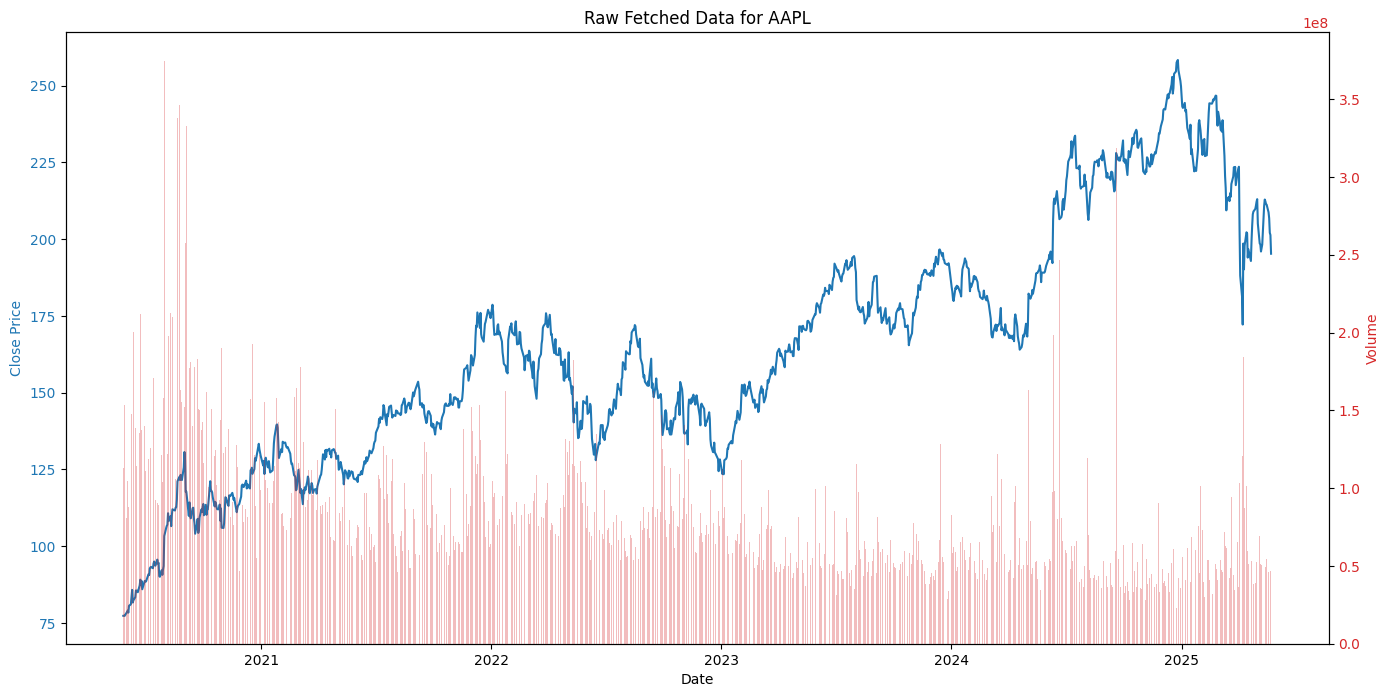

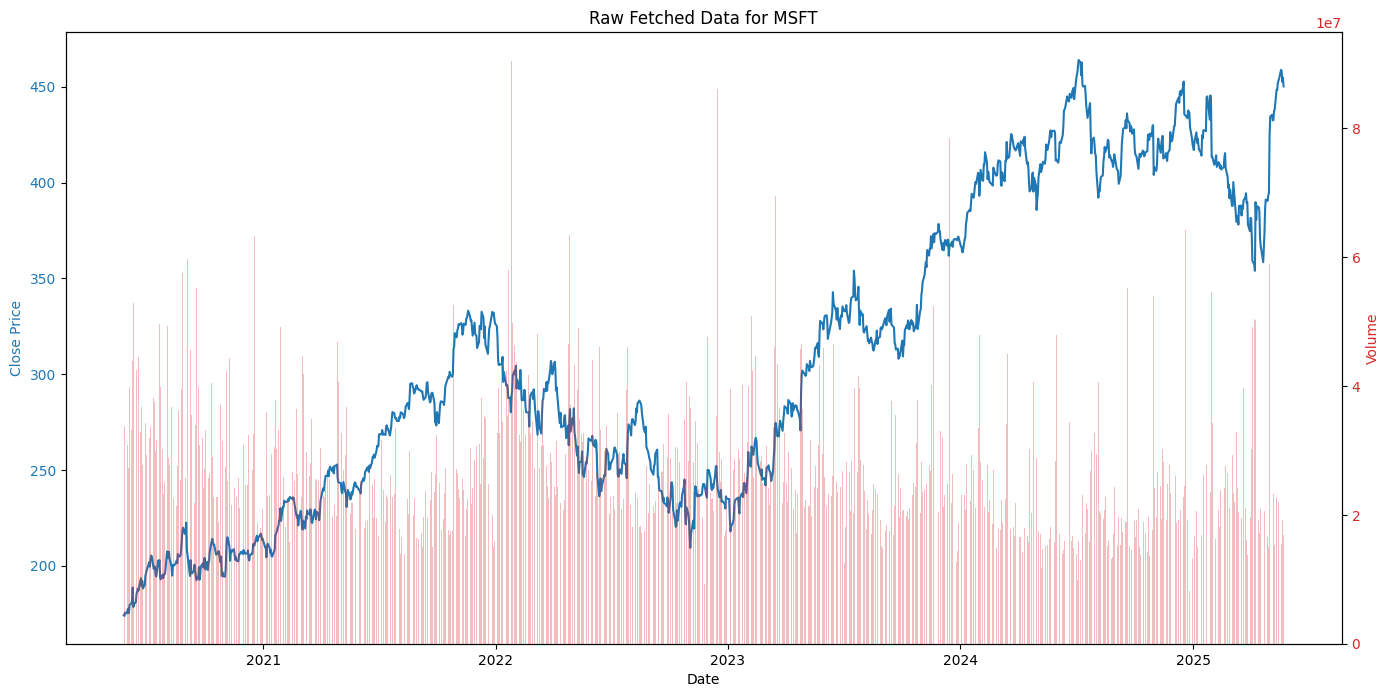

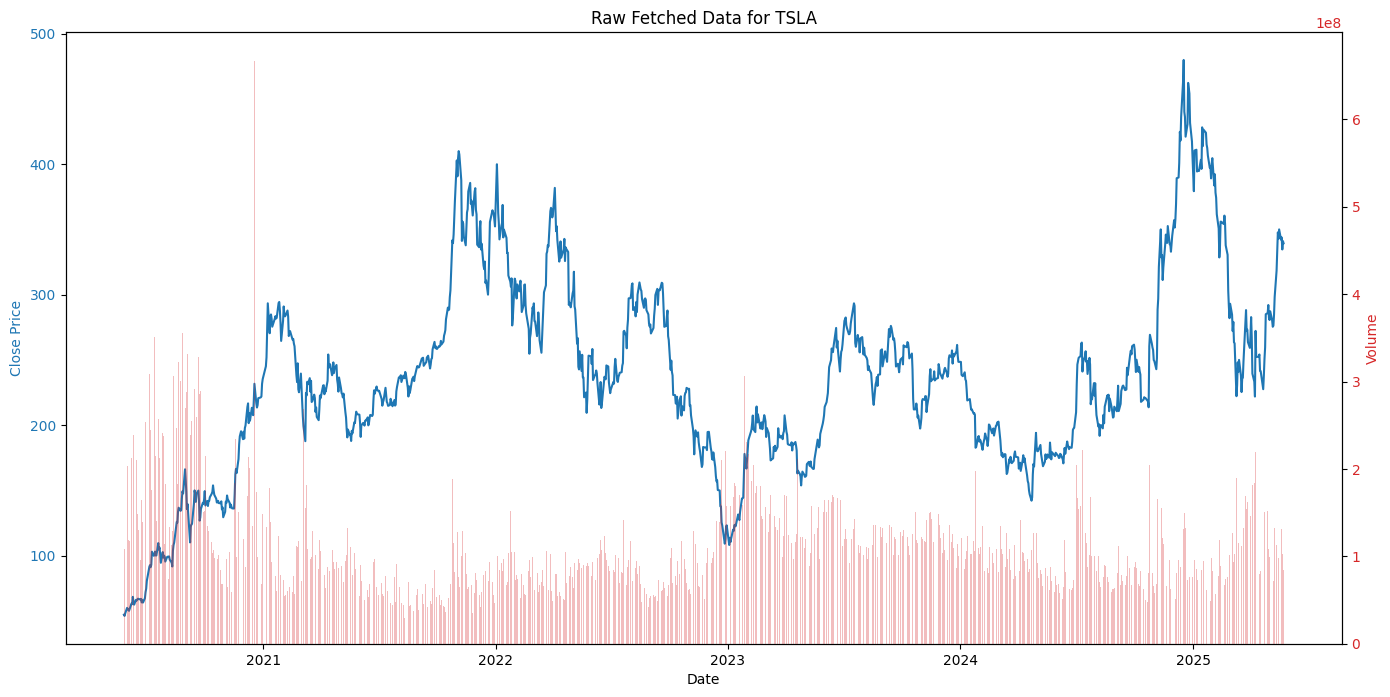

In [4]:
def plot_raw_data(ticker, df):
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plot closing price on the left y-axis
    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Close Price', color=color)
    ax1.plot(df.index, df['Close'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Plot volume on the right y-axis
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Volume', color=color)
    ax2.bar(df.index, df['Volume'], color=color, alpha=0.3)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title(f'Raw Fetched Data for {ticker}')
    plt.savefig(f'raw_data_{ticker}.png')  # Save instead of show for compatibility

# Assuming 'stock_data' is your dictionary of fetched DataFrames
tickers = ['AAPL', 'MSFT', 'TSLA']  # Add your tickers here
for ticker in tickers:
    df = stock_data[ticker]
    plot_raw_data(ticker, df)


Raw Data for AAPL:
                                 Open       High        Low      Close  \
Date                                                                    
2020-05-27 00:00:00-04:00  76.827492  77.452040  76.086284  77.306229   
2020-05-28 00:00:00-04:00  76.980587  78.601516  76.703552  77.340256   
2020-05-29 00:00:00-04:00  77.583275  78.045007  76.907687  77.264923   
2020-06-01 00:00:00-04:00  77.218738  78.336619  77.087507  78.215111   
2020-06-02 00:00:00-04:00  77.947796  78.601513  77.505502  78.577209   

                              Volume  Dividends  Stock Splits  
Date                                                           
2020-05-27 00:00:00-04:00  112945200        0.0           0.0  
2020-05-28 00:00:00-04:00  133560800        0.0           0.0  
2020-05-29 00:00:00-04:00  153532400        0.0           0.0  
2020-06-01 00:00:00-04:00   80791200        0.0           0.0  
2020-06-02 00:00:00-04:00   87642800        0.0           0.0  

Preprocessed Data 

<ipython-input-5-9e1494974778>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-5-9e1494974778>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)
<ipython-input-5-9e1494974778>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = scaler.fit_transform(df[columns])


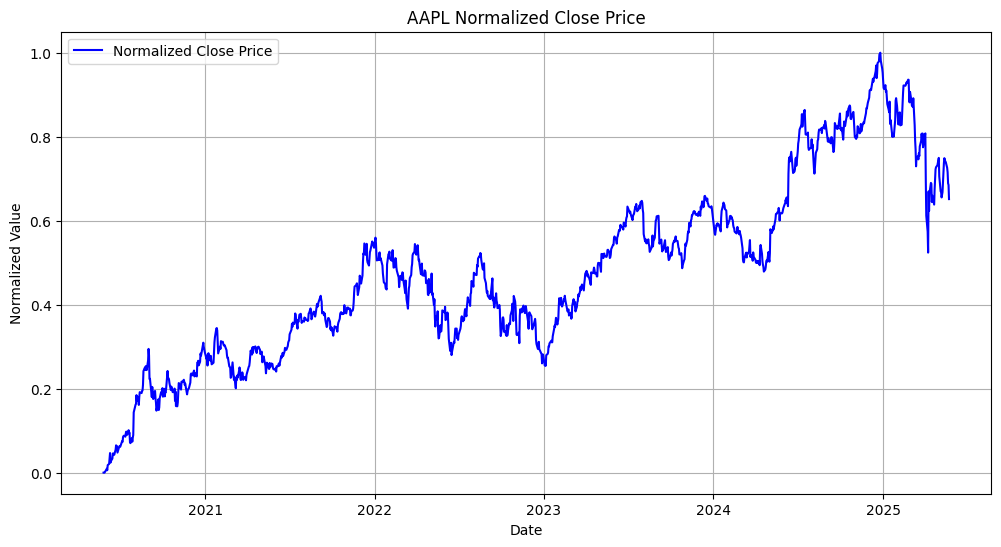


Raw Data for MSFT:
                                  Open        High         Low       Close  \
Date                                                                        
2020-05-27 00:00:00-04:00  172.647011  174.361992  169.197912  174.189529   
2020-05-28 00:00:00-04:00  173.164367  176.431427  172.819455  173.796692   
2020-05-29 00:00:00-04:00  175.070990  176.546450  172.848239  175.569199   
2020-06-01 00:00:00-04:00  174.888926  175.329651  173.854206  175.166779   
2020-06-02 00:00:00-04:00  176.527282  177.245846  173.748840  177.159622   

                             Volume  Dividends  Stock Splits  
Date                                                          
2020-05-27 00:00:00-04:00  39517100        0.0           0.0  
2020-05-28 00:00:00-04:00  33810200        0.0           0.0  
2020-05-29 00:00:00-04:00  42130400        0.0           0.0  
2020-06-01 00:00:00-04:00  22622400        0.0           0.0  
2020-06-02 00:00:00-04:00  30794600        0.0           0.0 

<ipython-input-5-9e1494974778>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-5-9e1494974778>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)
<ipython-input-5-9e1494974778>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = scaler.fit_transform(df[columns])



Preprocessed Data for MSFT:
                 Open      High       Low     Close    Volume
Date                                                        
2020-05-27  0.000000  0.000000  0.000000  0.001354  0.388553
2020-05-28  0.001779  0.007126  0.012414  0.000000  0.320013
2020-05-29  0.008336  0.007522  0.012513  0.006108  0.419938
2020-06-01  0.007709  0.003332  0.015961  0.004721  0.185648
2020-06-02  0.013343  0.009930  0.015600  0.011588  0.283796


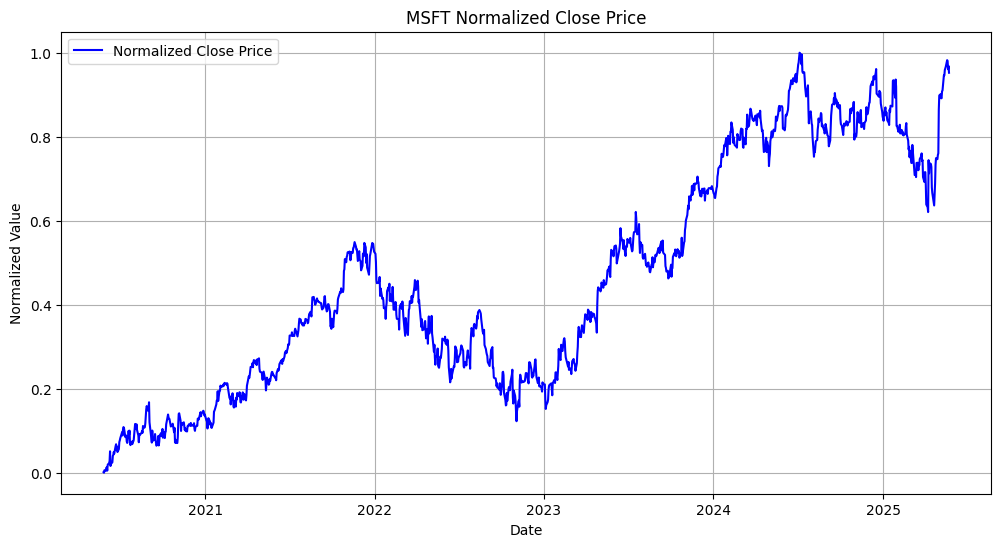


Raw Data for TSLA:
                                 Open       High        Low      Close  \
Date                                                                    
2020-05-27 00:00:00-04:00  54.723999  55.180668  52.333332  54.681999   
2020-05-28 00:00:00-04:00  54.234001  54.983334  53.445999  53.720669   
2020-05-29 00:00:00-04:00  53.916668  55.666668  53.613998  55.666668   
2020-06-01 00:00:00-04:00  57.200001  59.933334  56.939999  59.873333   
2020-06-02 00:00:00-04:00  59.646667  60.577332  58.066666  58.770668   

                              Volume  Dividends  Stock Splits  
Date                                                           
2020-05-27 00:00:00-04:00  173242500        0.0           0.0  
2020-05-28 00:00:00-04:00  108834000        0.0           0.0  
2020-05-29 00:00:00-04:00  176467500        0.0           0.0  
2020-06-01 00:00:00-04:00  224092500        0.0           0.0  
2020-06-02 00:00:00-04:00  203484000        0.0           0.0  

Preprocessed Data 

<ipython-input-5-9e1494974778>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-5-9e1494974778>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)
<ipython-input-5-9e1494974778>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = scaler.fit_transform(df[columns])


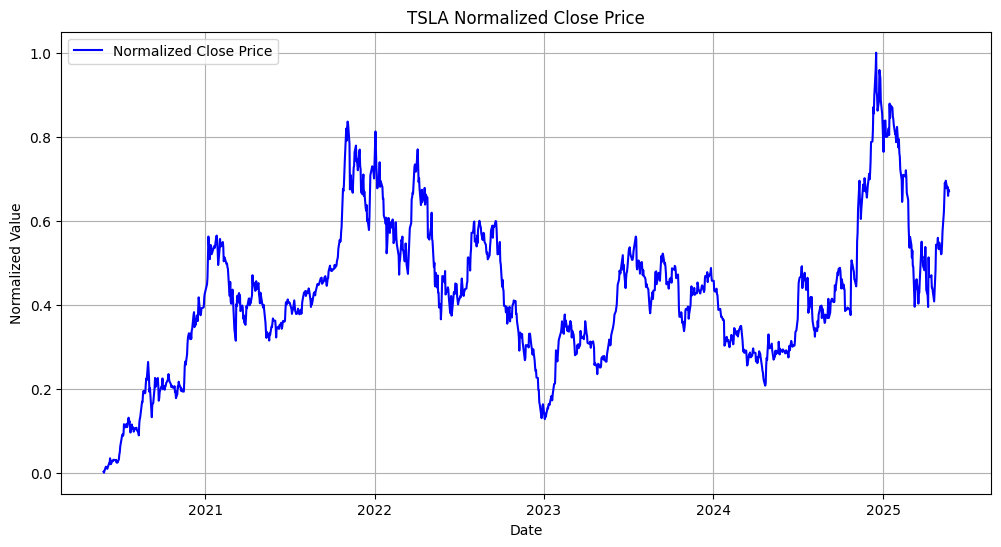

In [5]:
# Preprocess data
preprocessed_data = {}
scalers = {}
for ticker, df in stock_data.items():
    if not df.empty:
        # Display raw data
        print(f"\nRaw Data for {ticker}:\n", df.head())

        # Preprocessing
        df.index = pd.to_datetime(df.index).tz_localize(None)  # Remove timezone
        df.fillna(method='ffill', inplace=True)
        df.fillna(method='bfill', inplace=True)
        columns = ['Open', 'High', 'Low', 'Close', 'Volume']
        df = df[columns]
        scaler = MinMaxScaler()
        df[columns] = scaler.fit_transform(df[columns])
        preprocessed_data[ticker] = df
        scalers[ticker] = scaler

        # Display preprocessed data
        print(f"\nPreprocessed Data for {ticker}:\n", df.head())

        # Plot raw Close and Volume
        plt.figure(figsize=(12, 6))
        plt.plot(df.index, df['Close'], label='Normalized Close Price', color='blue')
        plt.title(f'{ticker} Normalized Close Price')
        plt.xlabel('Date')
        plt.ylabel('Normalized Value')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"No data for {ticker}.")

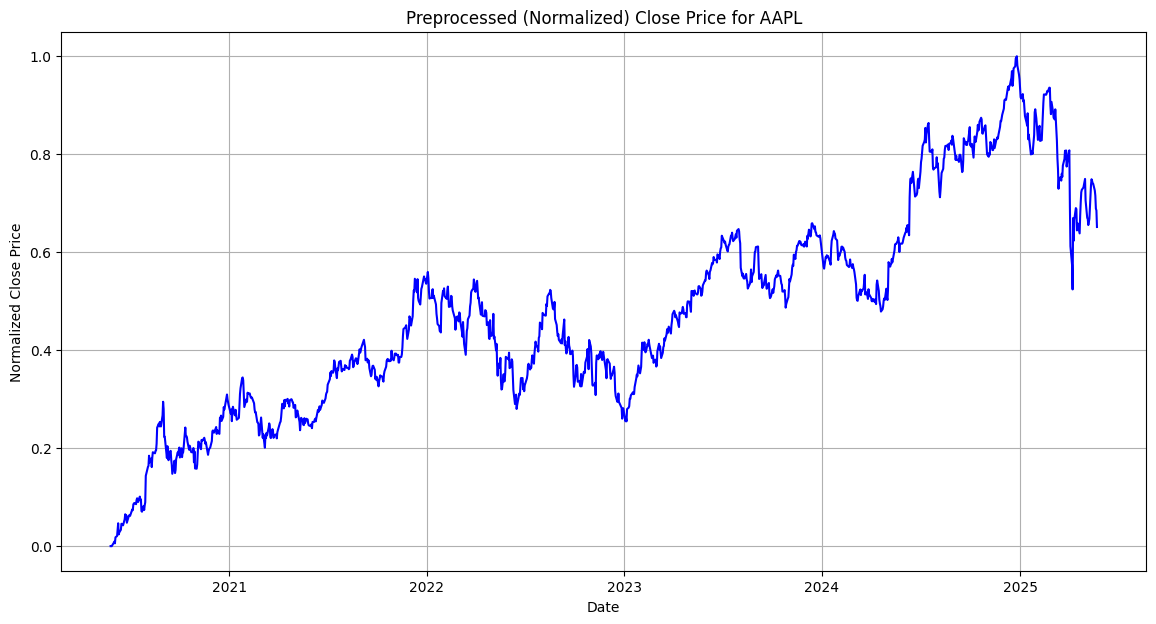

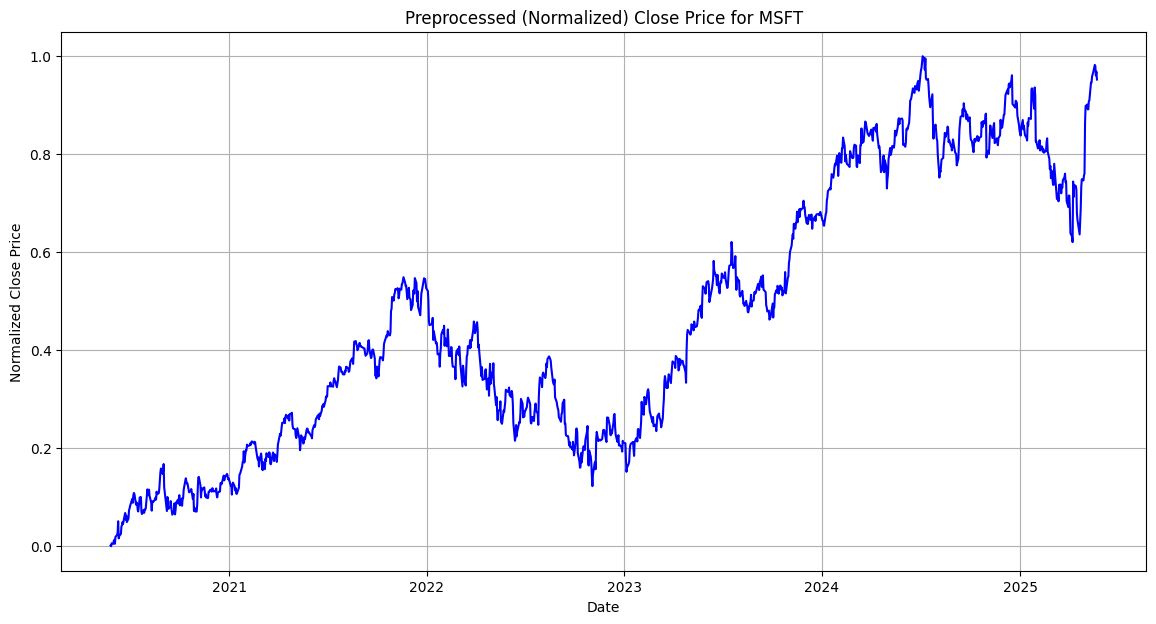

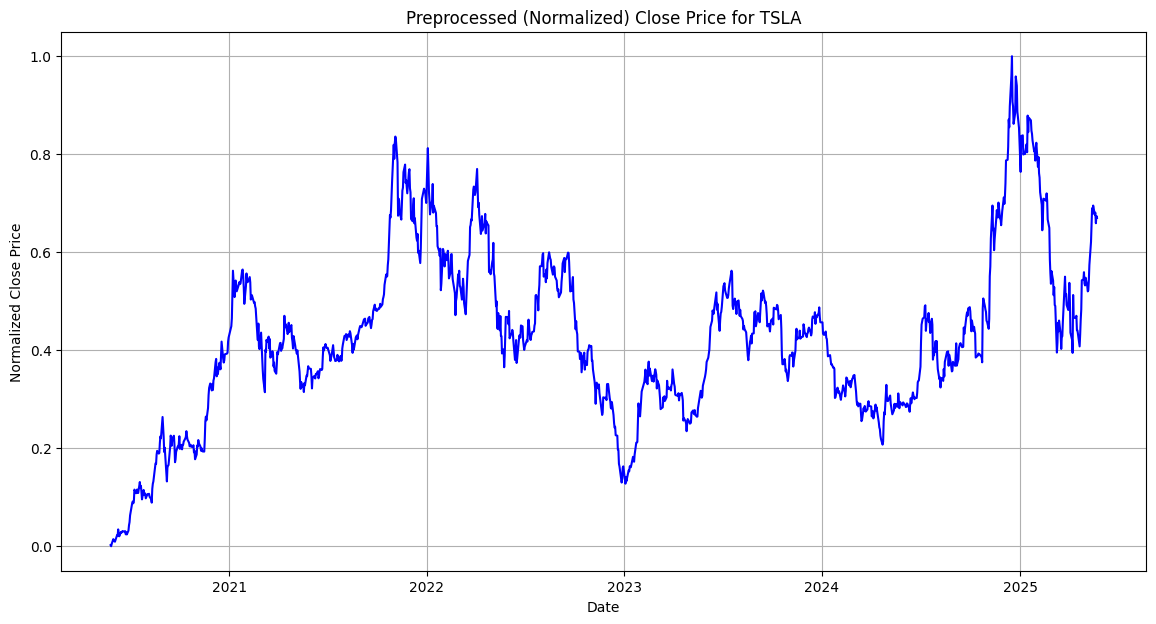

In [6]:
def plot_preprocessed_data(ticker, df):
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['Close'], color='blue')
    plt.title(f'Preprocessed (Normalized) Close Price for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Normalized Close Price')
    plt.grid(True)
    plt.savefig(f'preprocessed_data_{ticker}.png')

# Assuming 'preprocessed_data' holds your preprocessed DataFrames
for ticker in tickers:
    df = preprocessed_data[ticker]
    plot_preprocessed_data(ticker, df)


Data with Indicators for AAPL:
                 Open      High       Low     Close    Volume       SMA  \
Date                                                                     
2020-06-23  0.064351  0.071655  0.066059  0.065191  0.538080  0.026708   
2020-06-24  0.065695  0.066862  0.061022  0.056511  0.482448  0.029522   
2020-06-25  0.059913  0.061802  0.059746  0.062924  0.325511  0.032647   
2020-06-26  0.064902  0.062229  0.053634  0.047884  0.518431  0.035041   
2020-06-29  0.049896  0.058023  0.051297  0.058818  0.305926  0.037720   

                 EMA        RSI  BB_Middle    BB_Std  BB_Upper  BB_Lower  
Date                                                                      
2020-06-23  0.031987  74.106433   0.026708  0.020376  0.067460 -0.014044  
2020-06-24  0.034322  71.069608   0.029522  0.020413  0.070348 -0.011304  
2020-06-25  0.037046  69.574852   0.032647  0.020507  0.073661 -0.008367  
2020-06-26  0.038079  60.682104   0.035041  0.019252  0.073545 -0.003462 

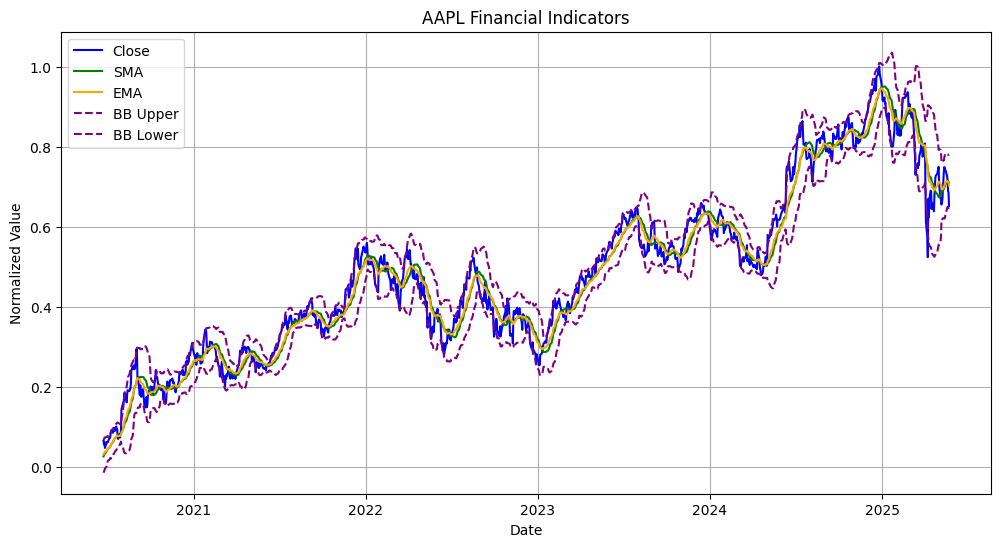


Data with Indicators for MSFT:
                 Open      High       Low     Close    Volume       SMA  \
Date                                                                     
2020-06-23  0.072120  0.072444  0.081546  0.067712  0.285271  0.026641   
2020-06-24  0.070506  0.070135  0.065552  0.054275  0.355207  0.029287   
2020-06-25  0.057986  0.061426  0.061972  0.062529  0.247878  0.032413   
2020-06-26  0.064345  0.059051  0.060035  0.049290  0.570608  0.034572   
2020-06-29  0.051331  0.054564  0.055667  0.056256  0.234639  0.037149   

                 EMA        RSI  BB_Middle    BB_Std  BB_Upper  BB_Lower  
Date                                                                      
2020-06-23  0.032219  68.425773   0.026641  0.020855  0.068351 -0.015070  
2020-06-24  0.034320  66.029147   0.029287  0.020835  0.070957 -0.012384  
2020-06-25  0.037006  64.678217   0.032413  0.020901  0.074214 -0.009388  
2020-06-26  0.038176  58.370113   0.034572  0.020261  0.075094 -0.005949 

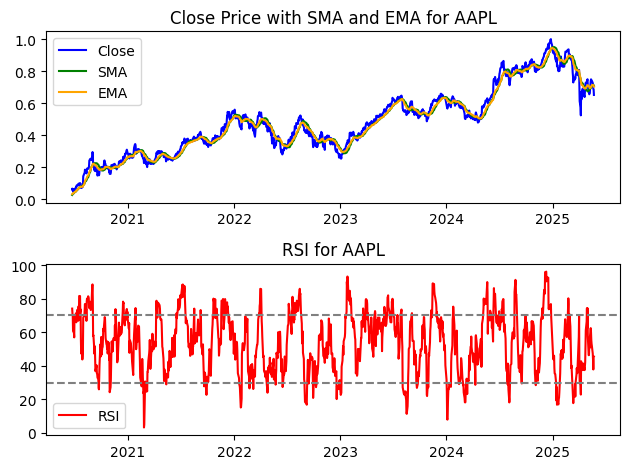

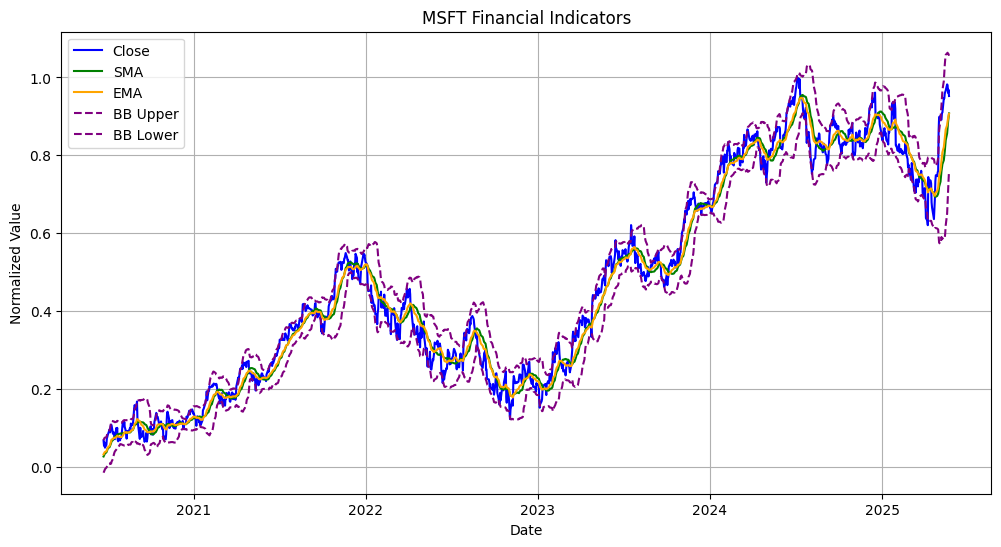


Data with Indicators for TSLA:
                 Open      High       Low     Close    Volume       SMA  \
Date                                                                     
2020-06-23  0.030038  0.028793  0.034390  0.030658  0.103736  0.019923   
2020-06-24  0.029284  0.027083  0.027665  0.024255  0.211926  0.021023   
2020-06-25  0.022990  0.024792  0.025034  0.028186  0.171773  0.022433   
2020-06-26  0.029390  0.026179  0.027950  0.024081  0.162363  0.023408   
2020-06-29  0.025319  0.028485  0.026905  0.031842  0.166402  0.024279   

                 EMA        RSI  BB_Middle    BB_Std  BB_Upper  BB_Lower  
Date                                                                      
2020-06-23  0.021667  65.200603   0.019923  0.010742  0.041408 -0.001561  
2020-06-24  0.021914  61.673809   0.021023  0.009934  0.040891  0.001155  
2020-06-25  0.022511  62.027633   0.022433  0.008720  0.039872  0.004993  
2020-06-26  0.022661  51.295447   0.023408  0.007640  0.038689  0.008128 

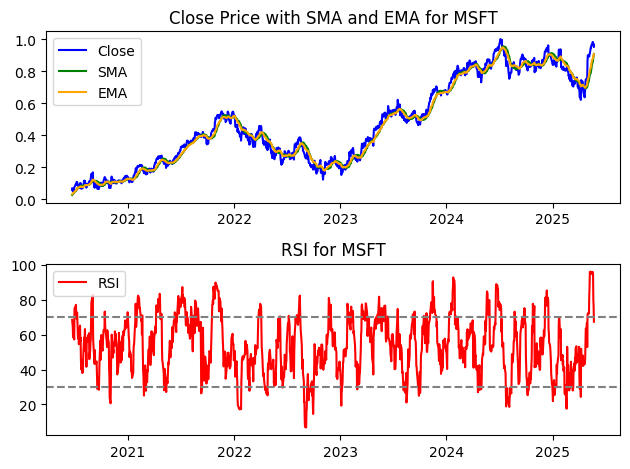

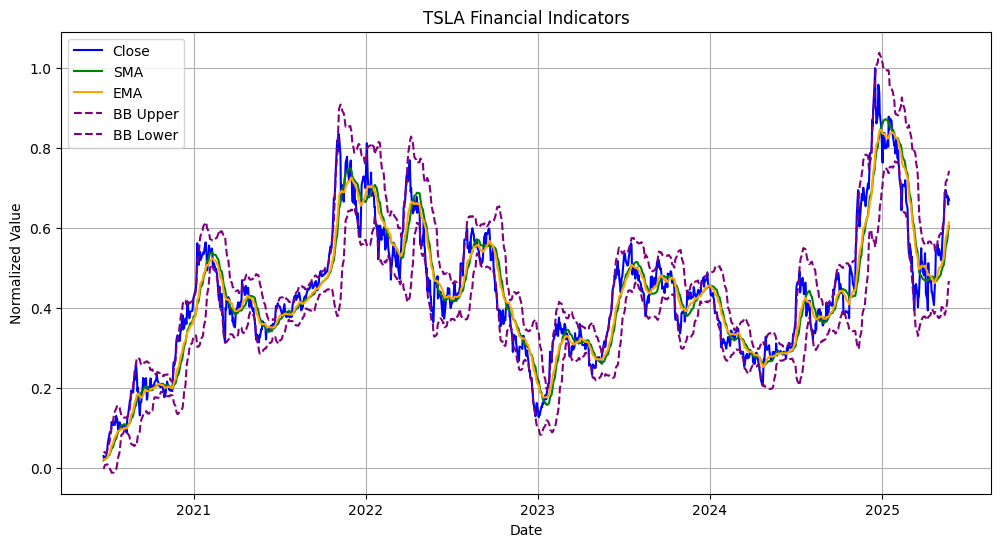

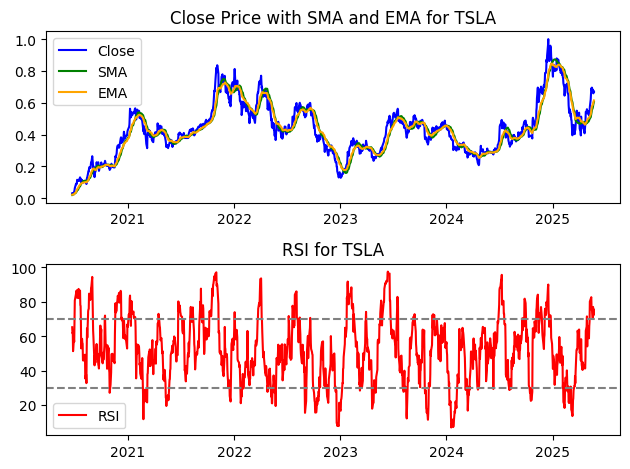

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

In [8]:
# calculate indicators


def calculate_indicators(df, window=20):
    df = df.copy()
    df['SMA'] = df['Close'].rolling(window=window).mean()
    df['EMA'] = df['Close'].ewm(span=window, adjust=False).mean()
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df['BB_Middle'] = df['Close'].rolling(window=window).mean()
    df['BB_Std'] = df['Close'].rolling(window=window).std()
    df['BB_Upper'] = df['BB_Middle'] + 2 * df['BB_Std']
    df['BB_Lower'] = df['BB_Middle'] - 2 * df['BB_Std']
    df.dropna(inplace=True)
    return df

feature_data = {}
for ticker in preprocessed_data:
    df = calculate_indicators(preprocessed_data[ticker])
    feature_data[ticker] = df
    print(f"\nData with Indicators for {ticker}:\n", df.head())

    # Plot indicators
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Close', color='blue')
    plt.plot(df.index, df['SMA'], label='SMA', color='green')
    plt.plot(df.index, df['EMA'], label='EMA', color='orange')
    plt.plot(df.index, df['BB_Upper'], label='BB Upper', color='purple', linestyle='--')
    plt.plot(df.index, df['BB_Lower'], label='BB Lower', color='purple', linestyle='--')
    plt.title(f'{ticker} Financial Indicators')
    plt.xlabel('Date')
    plt.ylabel('Normalized Value')
    plt.legend()
    plt.grid(True)
    plt.show()

    def plot_financial_indicators(ticker, df):
      plt.figure(figsize=(14, 10))

    # Subplot 1: Close Price with SMA and EMA
    plt.subplot(2, 1, 1)
    plt.plot(df.index, df['Close'], label='Close', color='blue')
    plt.plot(df.index, df['SMA'], label='SMA', color='green')
    plt.plot(df.index, df['EMA'], label='EMA', color='orange')
    plt.title(f'Close Price with SMA and EMA for {ticker}')
    plt.legend()

    # Subplot 2: RSI
    plt.subplot(2, 1, 2)
    plt.plot(df.index, df['RSI'], label='RSI', color='red')
    plt.axhline(y=70, color='gray', linestyle='--')
    plt.axhline(y=30, color='gray', linestyle='--')
    plt.title(f'RSI for {ticker}')
    plt.legend()

    plt.tight_layout()
    plt.savefig(f'financial_indicators_{ticker}.png')

# Assuming 'feature_data' holds DataFrames with indicators
for ticker in tickers:
    df = feature_data[ticker]
    plot_financial_indicators(ticker, df)

In [13]:
!pip install scikit-learn

#Unsupervised Anomaly Detection
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN

anomaly_results = {}
for ticker in feature_data:
    df = feature_data[ticker]
    features = ['Close', 'SMA', 'EMA', 'RSI', 'BB_Upper', 'BB_Lower']

    # Isolation Forest
    iso_forest = IsolationForest(contamination=0.01, random_state=42)
    iso_labels = iso_forest.fit_predict(df[features])
    iso_labels = pd.Series(iso_labels, index=df.index)

    # DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_labels = dbscan.fit_predict(df[features])
    dbscan_labels = pd.Series(dbscan_labels, index=df.index)

    anomaly_results[ticker] = {'IsolationForest': iso_labels, 'DBSCAN': dbscan_labels}

    # Print metrics
    total = len(df)
    iso_anomalies = sum(iso_labels == -1)
    dbscan_anomalies = sum(dbscan_labels == -1)
    print(f"\n{ticker} Anomaly Metrics:")
    print(f"Isolation Forest: {iso_anomalies} anomalies ({iso_anomalies/total*100:.2f}%)")
    print(f"DBSCAN: {dbscan_anomalies} anomalies ({dbscan_anomalies/total*100:.2f}%)")


AAPL Anomaly Metrics:
Isolation Forest: 13 anomalies (1.05%)
DBSCAN: 119 anomalies (9.62%)

MSFT Anomaly Metrics:
Isolation Forest: 13 anomalies (1.05%)
DBSCAN: 110 anomalies (8.89%)

TSLA Anomaly Metrics:
Isolation Forest: 13 anomalies (1.05%)
DBSCAN: 98 anomalies (7.92%)


In [14]:
#Time-Series Forecasting
# Install libraries
!pip install tensorflow prophet

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from prophet import Prophet

forecast_results = {}
for ticker in feature_data:
    df = feature_data[ticker]

    # LSTM
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df[['Close']])
    look_back = 60
    X, y = [], []
    for i in range(look_back, len(scaled_data)):
        X.append(scaled_data[i-look_back:i])
        y.append(scaled_data[i])
    X, y = np.array(X), np.array(y)
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
        LSTM(50),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=10, batch_size=32, verbose=1)  # Reduced epochs for speed
    lstm_preds = model.predict(X)
    lstm_preds = scaler.inverse_transform(lstm_preds)
    actual = scaler.inverse_transform(y)
    residuals = np.abs(actual - lstm_preds)
    threshold = 2 * np.std(residuals)
    lstm_anomalies = residuals > threshold

    # Prophet
    prophet_df = df[['Close']].reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
    prophet_df['ds'] = pd.to_datetime(prophet_df['ds']).dt.tz_localize(None)
    model = Prophet()
    model.fit(prophet_df)
    future = model.make_future_dataframe(periods=0)
    forecast = model.predict(future)
    prophet_preds = forecast.set_index('ds')['yhat'].reindex(df.index)
    residuals = np.abs(df['Close'] - prophet_preds).dropna()
    threshold = 2 * np.std(residuals)
    prophet_anomalies = residuals > threshold

    forecast_results[ticker] = {
        'LSTM_Preds': pd.Series(lstm_preds.flatten(), index=df.index[look_back:]),
        'LSTM_Anomalies': pd.Series(lstm_anomalies.flatten(), index=df.index[look_back:]),
        'Prophet_Preds': prophet_preds,
        'Prophet_Anomalies': prophet_anomalies
    }

    # Print metrics
    #print(f"\n{ticker} Forecast Metrics:")
    ##print(f"LSTM Anomalies: {sum(lstm_anomalies)} ({sum(lstm_anomalies)/len(lstm_anomalies)*100:.1f}%)")
    #print(f"LSTM Anomalies: {int(sum(lstm_anomalies))} ({float(sum(lstm_anomalies) / len(lstm_anomalies) * 100):.2f}%)")

    #print(f"Prophet Anomalies: {sum(prophet_anomalies)} ({sum(prophet_anomalies)/len(prophet_anomalies)*100:.2f}%)")




    # Print metrics
print(f"\n{ticker} Forecast Metrics:")

# LSTM anomalies
lstm_anomaly_count = int(sum(lstm_anomalies))
lstm_total = len(lstm_anomalies)
lstm_percentage = float(lstm_anomaly_count / lstm_total * 100) if lstm_total > 0 else 0.0
print(f"LSTM Anomalies: {lstm_anomaly_count} ({lstm_percentage:.2f}%)")

# Prophet anomalies
prophet_anomaly_count = int(sum(prophet_anomalies))
prophet_total = len(prophet_anomalies)
prophet_percentage = float(prophet_anomaly_count / prophet_total * 100) if prophet_total > 0 else 0.0
print(f"Prophet Anomalies: {prophet_anomaly_count} ({prophet_percentage:.2f}%)")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0943
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0034
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0017
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0014
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0015
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0014
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0017
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf44_vmnt/8fqqa5kq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf44_vmnt/yvrc4338.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76882', 'data', 'file=/tmp/tmpf44_vmnt/8fqqa5kq.json', 'init=/tmp/tmpf44_vmnt/yvrc4338.json', 'output', 'file=/tmp/tmpf44_vmnt/prophet_modeldf3co8bp/prophet_model-20250526172217.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:22:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:22:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0707
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0031
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0020
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0020
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0018
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0015
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf44_vmnt/wj7r_dpi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf44_vmnt/9v87j07_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12408', 'data', 'file=/tmp/tmpf44_vmnt/wj7r_dpi.json', 'init=/tmp/tmpf44_vmnt/9v87j07_.json', 'output', 'file=/tmp/tmpf44_vmnt/prophet_modeli6hflhph/prophet_model-20250526172225.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:22:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:22:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0832
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0043
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0034
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0027
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0025
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0025
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0019
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0021
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0019
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0019
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf44_vmnt/iwpdv808.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf44_vmnt/s81z0m6r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53889', 'data', 'file=/tmp/tmpf44_vmnt/iwpdv808.json', 'init=/tmp/tmpf44_vmnt/s81z0m6r.json', 'output', 'file=/tmp/tmpf44_vmnt/prophet_modelgx6fasfe/prophet_model-20250526172239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:22:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:22:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



TSLA Forecast Metrics:
LSTM Anomalies: 162 (13.76%)
Prophet Anomalies: 227 (18.35%)


<ipython-input-14-e03d2b397c54>:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lstm_anomaly_count = int(sum(lstm_anomalies))


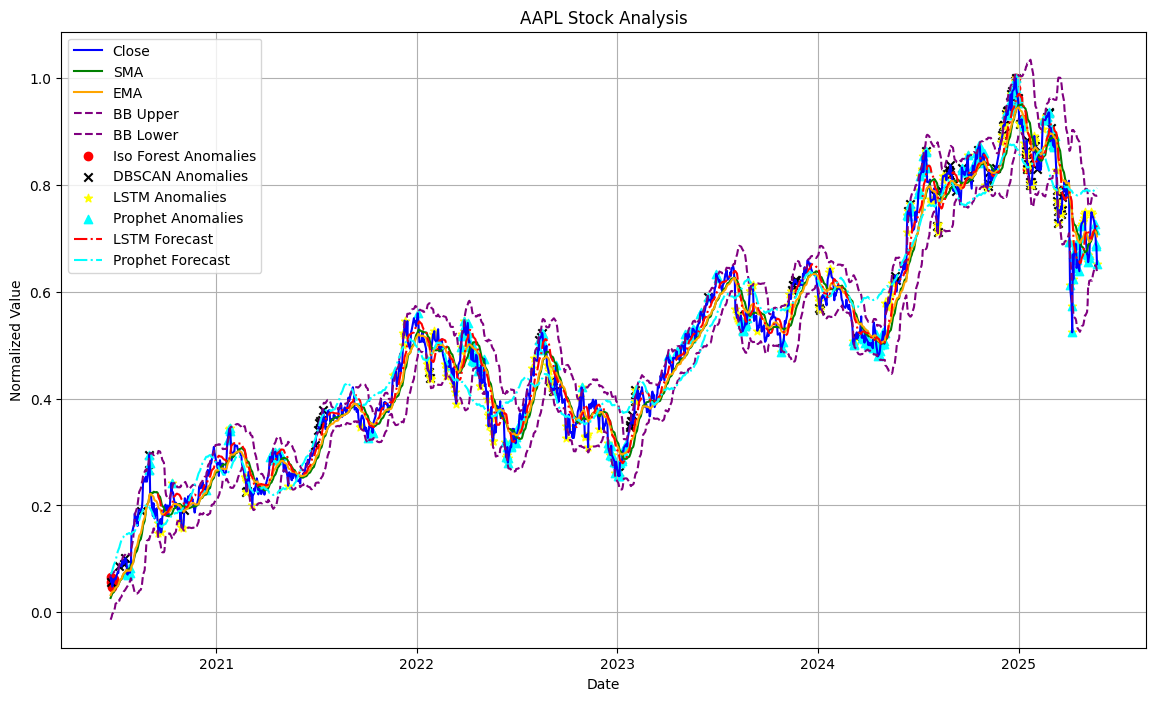

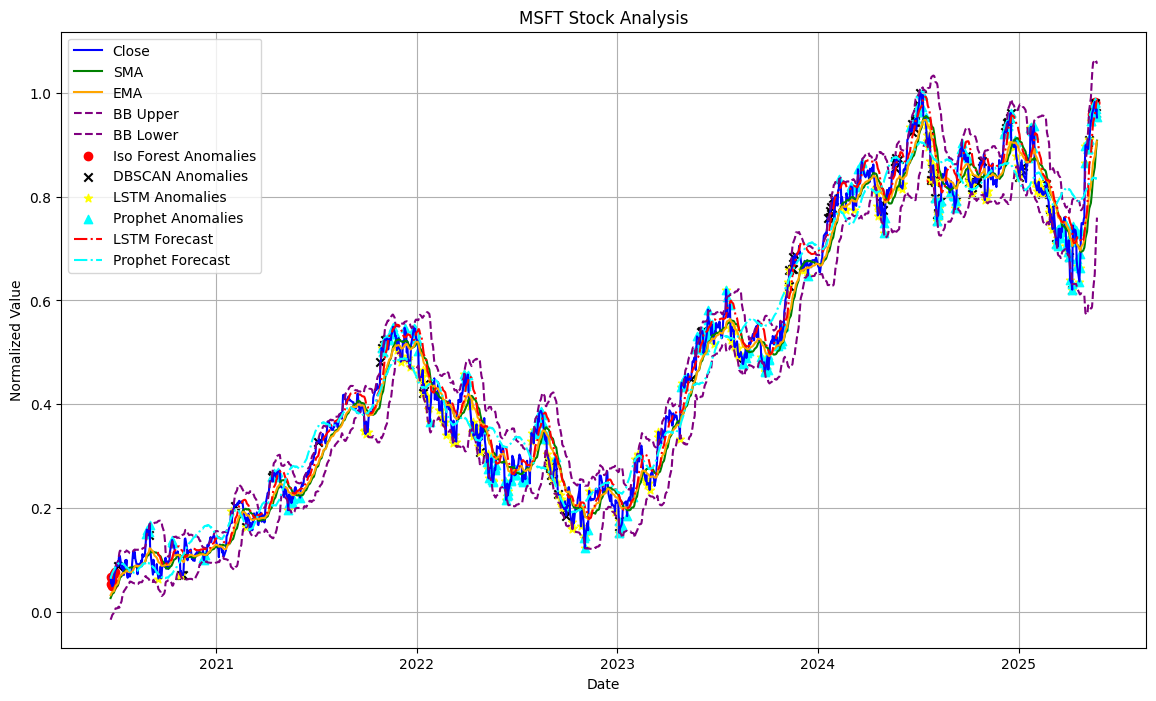

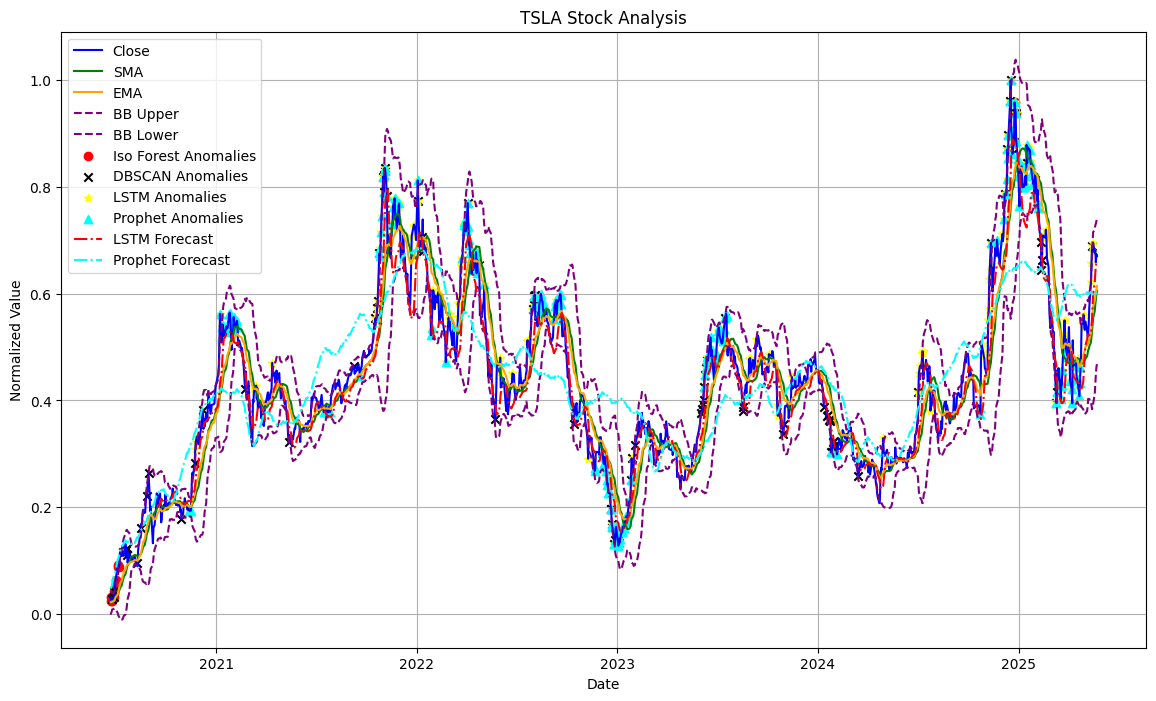

In [15]:
#Visualization

for ticker in feature_data:
    df = feature_data[ticker]
    anomalies = anomaly_results[ticker]
    forecasts = forecast_results[ticker]

    plt.figure(figsize=(14, 8))
    plt.plot(df.index, df['Close'], label='Close', color='blue')
    plt.plot(df.index, df['SMA'], label='SMA', color='green')
    plt.plot(df.index, df['EMA'], label='EMA', color='orange')
    plt.plot(df.index, df['BB_Upper'], label='BB Upper', color='purple', linestyle='--')
    plt.plot(df.index, df['BB_Lower'], label='BB Lower', color='purple', linestyle='--')

    # Plot anomalies
    iso_anomalies = df.index[anomalies['IsolationForest'] == -1]
    plt.scatter(iso_anomalies, df.loc[iso_anomalies, 'Close'], label='Iso Forest Anomalies', color='red', marker='o')
    dbscan_anomalies = df.index[anomalies['DBSCAN'] == -1]
    plt.scatter(dbscan_anomalies, df.loc[dbscan_anomalies, 'Close'], label='DBSCAN Anomalies', color='black', marker='x')
    #lstm_anomalies = df.index[forecasts['LSTM_Anomalies']]
    lstm_anomaly_dates = forecasts['LSTM_Anomalies'][forecasts['LSTM_Anomalies']].index
    #plt.scatter(lstm_anomalies, df.loc[lstm_anomalies, 'Close'], label='LSTM Anomalies', color='yellow', marker='*')
    plt.scatter(lstm_anomaly_dates, df.loc[lstm_anomaly_dates, 'Close'], label='LSTM Anomalies', color='yellow', marker='*')

    prophet_anomalies = df.index[forecasts['Prophet_Anomalies']]
    plt.scatter(prophet_anomalies, df.loc[prophet_anomalies, 'Close'], label='Prophet Anomalies', color='cyan', marker='^')

    # Plot forecasts
    plt.plot(forecasts['LSTM_Preds'], label='LSTM Forecast', color='red', linestyle='-.')
    plt.plot(forecasts['Prophet_Preds'], label='Prophet Forecast', color='cyan', linestyle='-.')

    plt.title(f'{ticker} Stock Analysis')
    plt.xlabel('Date')
    plt.ylabel('Normalized Value')
    plt.legend()
    plt.grid(True)
    plt.show()